Cotizaciones

Se buscó información de las cotizaciones del peso mexicano respecto del dolar en el período que se corresponse a los datos de las publicaciones.
El objetivo es analizar si los precios de los inmuebles en dólares se mantienen constantes o si aumentan a medida que avanza el tiempo.

In [56]:
#Se carga el df de cotizaciones
cotizaciones = pd.read_csv("../../enunciado/data/cotizacion.csv", dtype={'cotizacion':'float'}, parse_dates=["fecha"])
cotizaciones['dia'] = cotizaciones['fecha'].dt.day
cotizaciones['mes'] = cotizaciones['fecha'].dt.month
cotizaciones['anio'] = cotizaciones['fecha'].dt.year

In [57]:
#Se calcula cotización promedio por mes
cotizaciones_por_mes = cotizaciones.groupby(['anio', 'mes']).agg({'cotizacion':'mean'})
cotizaciones_por_mes = cotizaciones_por_mes.reset_index()
cotizaciones_por_mes

,anio,mes,cotizacion
0,2012,1,13.209137
1,2012,2,12.918510
2,2012,3,12.863155
3,2012,4,13.191150
4,2012,5,13.659909
5,2012,6,13.604395
6,2012,7,13.254914
7,2012,8,13.170191
8,2012,9,12.973638
9,2012,10,13.011255


In [58]:
#Se carga el df de publicaciones
%run "../../utils/dataset_parsing.ipynb"

publicaciones = levantar_datos("../../" + DATASET_RELATIVE_PATH)

In [59]:
#Se agrega la columna mes_anio tanto en el df de cotizaciones como en el df de publicaciones para poder joinear
cotizaciones_por_mes['anio_mes'] = cotizaciones_por_mes['anio'].astype('str') + cotizaciones_por_mes['mes'].astype('str').str.zfill(width=2)
publicaciones['anio_mes'] = publicaciones['ano'].astype('str') + publicaciones['mes'].astype('str').str.zfill(width=2)

In [60]:
#Se joinea y se calcula el precio_en_dolares de las propiedades
publicaciones = pd.merge(publicaciones, cotizaciones_por_mes, on='anio_mes')
publicaciones['precio_en_dolares'] = publicaciones['precio'] / publicaciones['cotizacion']
publicaciones[['precio', 'precio_en_dolares', 'cotizacion']]

,precio,precio_en_dolares,cotizacion
0,2273000.0,138826.883316,16.372910
1,1300000.0,79399.449323,16.372910
2,2500000.0,152691.248697,16.372910
3,1850000.0,112991.524036,16.372910
4,3800000.0,232090.698020,16.372910
...,...,...,...
239995,2100000.0,164450.436009,12.769805
239996,1200000.0,93971.677719,12.769805
239997,1530000.0,119813.889092,12.769805
239998,980000.0,76743.536804,12.769805


In [93]:
precio_promedio_en_dolares = publicaciones.groupby(['ano','mes_x']).agg({'precio_en_dolares':'mean'})

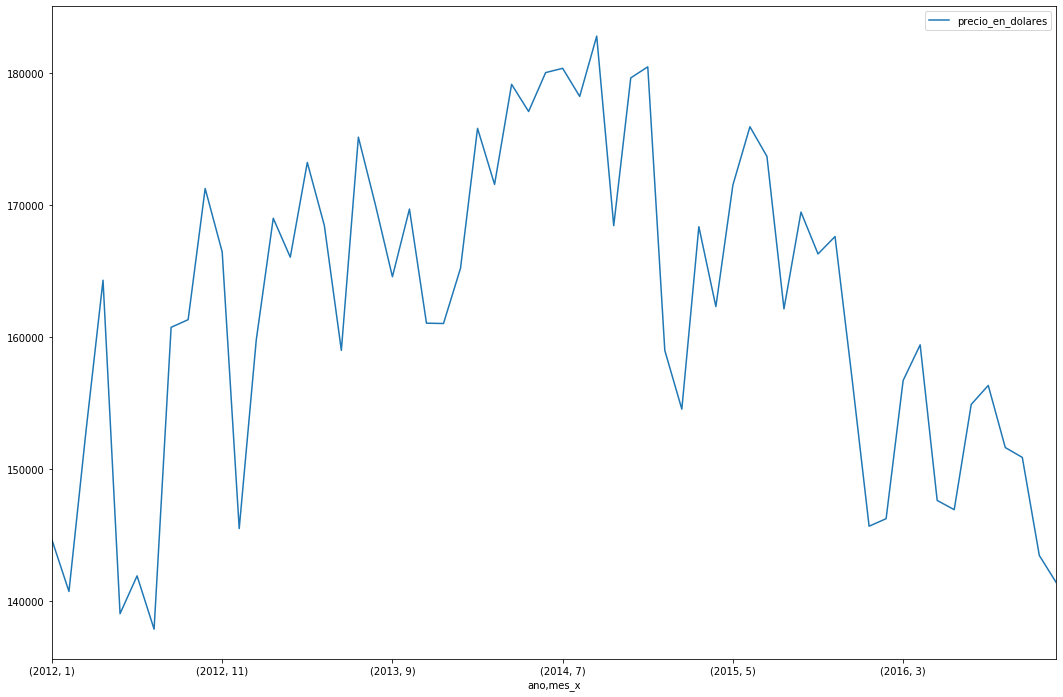

In [95]:
precio_promedio_en_dolares.plot(figsize=(18,12))

In [97]:
precio_promedio_en_pesos_mexicanos = publicaciones.groupby(['ano','mes_x']).agg({'precio':'mean'})

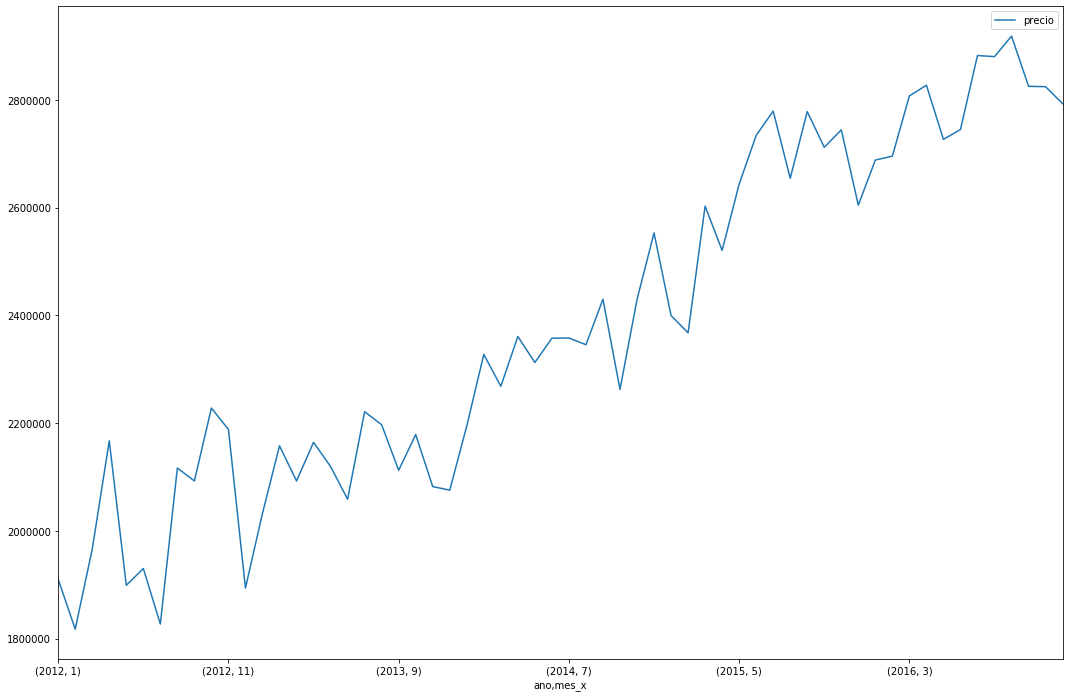

In [98]:
precio_promedio_en_pesos_mexicanos.plot(figsize=(18,12))

In [103]:
cotizaciones_por_anio_mes = cotizaciones_por_mes.set_index(['anio', 'mes'])['cotizacion']

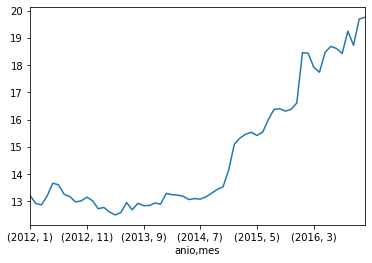

In [104]:
cotizaciones_por_anio_mes.plot()

En los últimos dos gráficos se observa que tanto la cotización del dólar como el valor de los inmuebles fue aumentando en el tiempo.